# SVD - reducing dimensionality

- using nouns of questions and answers to reduce the dimensionality of the embedding space 
- can go from ~11,000 features (words) to 3500 features (principal componenets) and retain ~95% variance of data
- can now use these new 3500 features in a classifier to classify our questions

# Load Data

In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
font = {'size'   : 20}

matplotlib.rc('font', **font)
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

from tqdm import tqdm
runType='./figures/3-3-svd-nouns-only-full-dataset-extra-stopwords'

In [3]:
# load tokenized data (nouns)

allData = pd.read_csv('../data/only-nouns-data.csv', index_col='index')
allData.topic = allData.topic.apply(str.lower)
allData = allData[allData.textNoun.notna()]
len(allData)

11842

In [4]:
allData.topic.value_counts()

past paper               1561
endocrinology            1105
cardiology                980
neurology                 915
rheumatology              871
gastroenterology          808
respiratory               792
haematology               733
nephrology                689
basic science             673
infectious disease        612
clinical pharmacology     573
psychiatry                348
dermatology               328
statistics                202
ophthalmology             176
emergency medicine        149
misc                      115
tropical medicine          99
medicine                   44
pharmacology               42
ethics and law             16
general revision           11
Name: topic, dtype: int64

In [5]:
# need to remove the non-labelled questions and
topicsToRemove = ['past paper','misc']
# , 'basic science',
#                   'clinical pharmacology', 'emergency medicine',
#                   'tropical medicine', 'medicine', 'ethics and law',
#                   'general revision', 'ophthalmology']
questionsToBeLabelled = allData.loc[allData.topic.isin(topicsToRemove)]
allDataRevised = allData.loc[~allData.topic.isin(topicsToRemove)]

In [6]:
print(len(allDataRevised), len(questionsToBeLabelled))

10166 1676


In [7]:
# join up important columns in dataframe
joinedDf = allDataRevised.copy()
additionalStopWords = [
    'blood','man','part','treatment','woman','symptom','cell',
    'syndrome','case','test','infection','level','day','month',
    'drug','investigation','week','cause','present','therapy',
    'pressure','feature','chest','failure','serum','weight'
]
joinedDf.textNoun = joinedDf.textNoun.apply(lambda x: ' '.join([word for word in x.split(' ') if word not in additionalStopWords]))
joinedDf.sample(2)

,text,topic,textLemma,textPos,textToken,textNoun
index,,,,,,
5676,there is presently no known effective treatment for a chronic disease. a new treatment is known to be effective in animal models and shows promise in short term studies in patients. there are some...,statistics,"['there', 'be', 'presently', 'no', 'know', 'effective', 'treatment', 'for', 'a', 'chronic', 'disease', '.', 'a', 'new', 'treatment', 'be', 'know', 'to', 'be', 'effective', 'in', 'animal', 'model',...","['PRON', 'AUX', 'ADV', 'DET', 'VERB', 'ADJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'DET', 'ADJ', 'NOUN', 'AUX', 'VERB', 'PART', 'AUX', 'ADJ', 'ADP', 'NOUN', 'NOUN', 'CCONJ', 'VERB', 'VERB'...","['there', 'is', 'presently', 'no', 'known', 'effective', 'treatment', 'for', 'a', 'chronic', 'disease', '.', 'a', 'new', 'treatment', 'is', 'known', 'to', 'be', 'effective', 'in', 'animal', 'model...",animal model term study concern hepato- bone marrow toxicity toxicity study blind placebo study animal testing volunteer phase term study phase testing process phase study trial benefit state safe...
450,a 45 year old man presents with recurrent sinusitis for over a year and occasionally noticed a rash on his chest. routine blood tests show that he has a serum urea of 14 mmol/l and creatinine of 1...,nephrology,"['a', '45', 'year', 'old', 'man', 'present', 'with', 'recurrent', 'sinusitis', 'for', 'over', 'a', 'year', 'and', 'occasionally', 'notice', 'a', 'rash', 'on', '-PRON-', 'chest', '.', 'routine', 'b...","['DET', 'NUM', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'ADP', 'ADJ', 'NOUN', 'ADP', 'ADP', 'DET', 'NOUN', 'CCONJ', 'ADV', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT', 'ADJ', 'NOUN', 'NOUN', 'VERB'...","['a', '45', 'year', 'old', 'man', 'presents', 'with', 'recurrent', 'sinusitis', 'for', 'over', 'a', 'year', 'and', 'occasionally', 'noticed', 'a', 'rash', 'on', 'his', 'chest', '.', 'routine', 'bl...",sinusitis rash urea creatinine micromole vasculitis vasculitis granulomatosis involvement nasal tract sinus wegener pattern vasculitis antibody antibody antigen myeloperoxidase


- let's see if we can add any additional stopwords

<FreqDist with 12516 samples and 301799 outcomes> [('lesion', 1380), ('hypertension', 1347)]


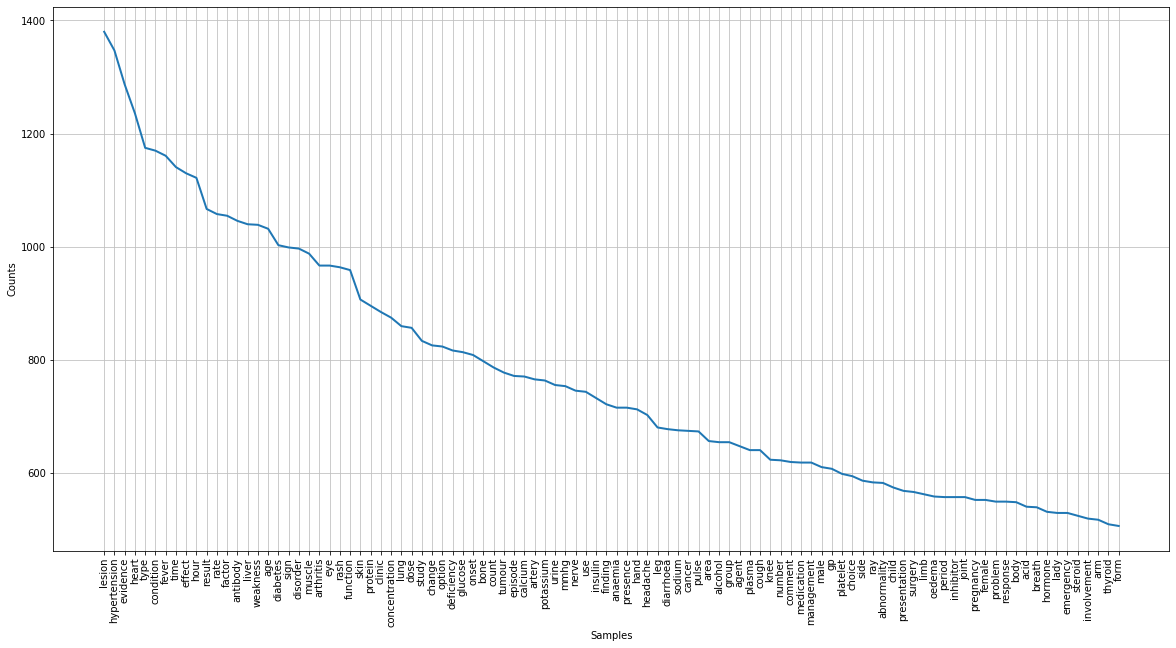

In [11]:
tokenized = ' '.join(joinedDf.textNoun.tolist()).split()
# count the number of unique words in the dataframe and plot graph
from nltk.probability import FreqDist
fdist = FreqDist(tokenized)
print(fdist, fdist.most_common(2))
fig = plt.figure(figsize=(20,10))
fdist.plot(100,cumulative=False)
fig.savefig(runType+'words-freq-distr.png')
plt.show()

In [ ]:
additionalStopWords = [
    'blood','man','part','treatment','woman','symptom','cell',
    'syndrome','case','test','infection','level','day','month',
    'drug','investigation','week','cause','present','therapy',
    'pressure','feature','chest','failure','serum','weight'
]

In [55]:
print('number of unique words', len(set(tokenized)))
print('number of unique topics', len(set(joinedDf.topic.tolist())))

number of unique words 12516
number of unique topics 21


## Document-term matrix

- can use two types of vectorizer - count (BoW and tf-idf)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [57]:
## TF-IDF embedding

tfIdfVectorizer = TfidfVectorizer(stop_words=None, 
                                 max_features= 10000,
                                 max_df = 0.5, 
                                 smooth_idf=True,
                                 use_idf=True)
tfIdfX = tfIdfVectorizer.fit_transform(joinedDf['textNoun'])

In [58]:
n_comp = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1500,2000,2500,3000,5000]
explained = [] # explained variance ratio for each component of Truncated SVD

for comp in tqdm(n_comp):
    # SVD represent documents and terms in vectors
    svd_model_tfIdf = TruncatedSVD(n_components=comp)
    svd_model_tfIdf.fit(tfIdfX)
    explained.append(svd_model_tfIdf.explained_variance_ratio_.sum())

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [07:05<00:00, 23.67s/it]


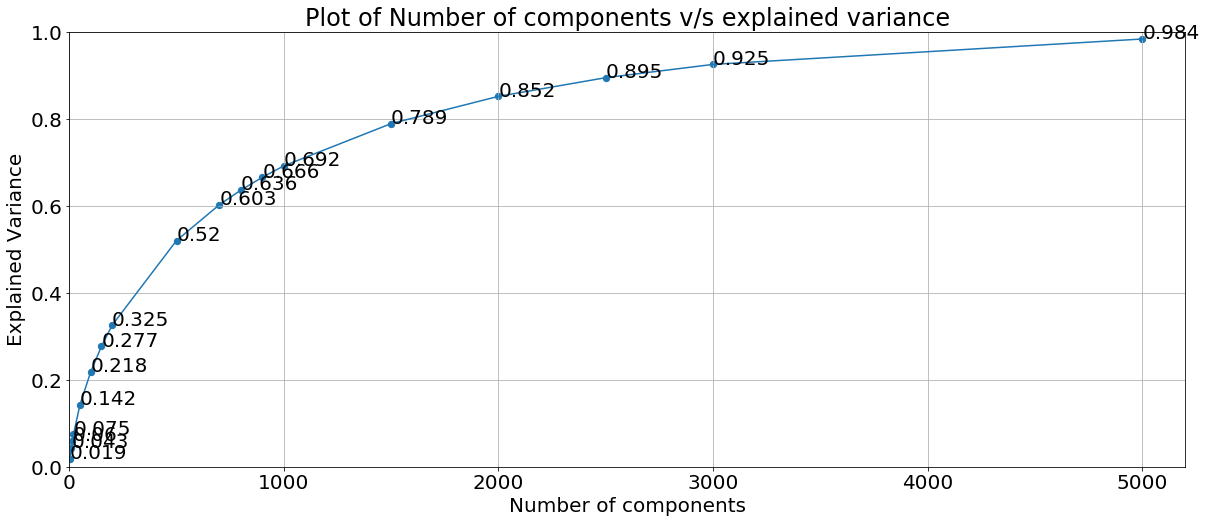

In [59]:
plt.figure(figsize=(20,8))
plt.scatter(n_comp, explained, s=40)
plt.plot(n_comp, explained)
plt.axis([0, 5200, 0, 1.0])
plt.grid()
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
for a,b in zip(n_comp, explained): 
    plt.text(a, b, str(round(b,3)))
plt.savefig(runType+'number-of-components-vs-variance.png')
plt.show()

In [60]:
reducedDataSetSVDResult = [n_comp, explained]

In [61]:
with open(runType+"number-of-components-vs-variance.dat", "wb") as fp:
    pickle.dump(reducedDataSetSVDResult, fp)

In [65]:
with open('./figures/3-3-svd-nouns-only-reduced-datasetnumber-of-components-vs-variance.dat','rb') as fp:
    reduc=pickle.load(fp)
    
with open('./figures/3-3-svd-nouns-only-full-datasetnumber-of-components-vs-variance.dat','rb') as fp:
    full=pickle.load(fp)
    
with open('./figures/3-3-svd-nouns-only-full-dataset-extra-stopwordsnumber-of-components-vs-variance.dat','rb') as fp:
    fullExclStopWords=pickle.load(fp)

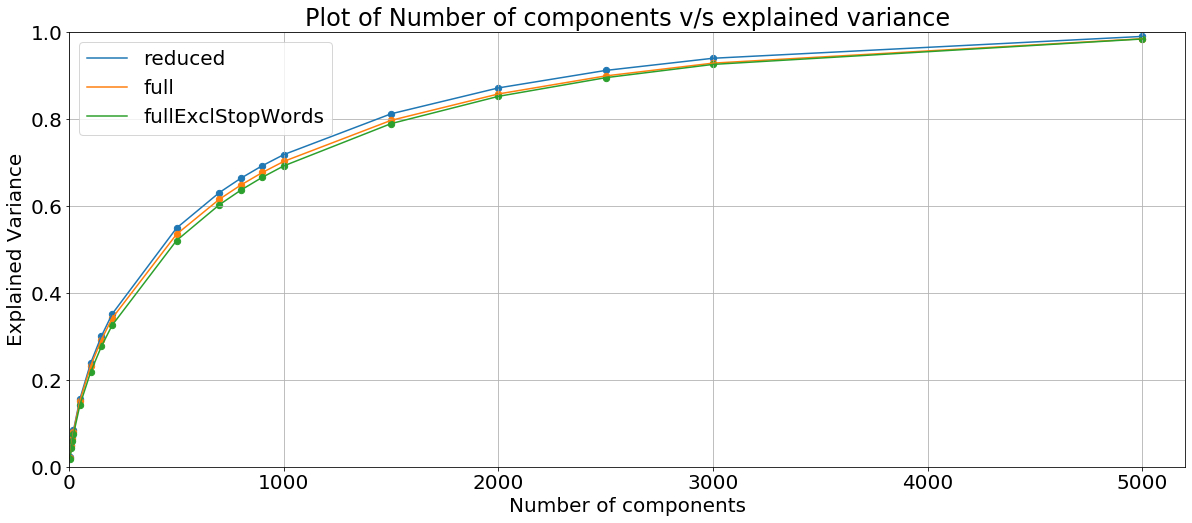

In [66]:
plt.figure(figsize=(20,8))
plt.scatter(reduc[0], reduc[1], s=40)
plt.plot(reduc[0], reduc[1], label='reduced')
plt.scatter(full[0], full[1], s=40)
plt.plot(full[0], full[1], label='full')
plt.scatter(fullExclStopWords[0], fullExclStopWords[1], s=40)
plt.plot(fullExclStopWords[0], fullExclStopWords[1], label='fullExclStopWords')
plt.legend()
plt.axis([0, 5200, 0, 1.0])
plt.grid()
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
# for a,b in zip(n_comp, explained): 
#     plt.text(a, b, str(round(b,3)))
plt.show()